<a href="https://colab.research.google.com/github/vanshika-tiwari123/GeoAI_Object_Detection_Sentinel2/blob/main/GeoAI_Object_Detection_Sentinel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Required Libraries

In [1]:
!pip install ultralytics opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.3 MB/s eta 0:00:00


Import Libraries

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt



In [3]:
from ultralytics import YOLO
model = YOLO("https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n-seg.pt")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [9]:
CLASS_NAMES = {
    0: "Water",
    1: "Vegetation",
    2: "Urban / Built-up",
    3: "Agriculture",
    4: "Barren Land"
}


In [14]:
import os
image_files = os.listdir('/content')
image_files

['.config',
 '2028.png',
 '26275 - Copy.png',
 '6478 - Copy.png',
 '6661 - Copy.png',
 '6328 - Copy.png',
 '29 - Copy (2) - Copy.png',
 '21 - Copy (2) - Copy.png',
 '6537 - Copy.png',
 '42 - Copy (2) - Copy.png',
 '6554 - Copy.png',
 '37.png',
 '6384 - Copy.png',
 '6395 - Copy.png',
 '6388 - Copy.png',
 '6475 - Copy.png',
 '6459 - Copy.png',
 '6439 - Copy.png',
 'weights',
 '23 - Copy (2) - Copy.png',
 '7 - Copy (2) - Copy.png',
 '6434 - Copy.png',
 '2051.png',
 '6350 - Copy.png',
 '6436 - Copy.png',
 '6455 - Copy.png',
 '26330.png',
 '6365 - Copy.png',
 '6592 - Copy.png',
 '6530 - Copy.png',
 '6334 - Copy.png',
 '5 - Copy (2) - Copy.png',
 '6435 - Copy.png',
 '26321.png',
 '6364 - Copy.png',
 '6371 - Copy.png',
 '6375 - Copy.png',
 '6669 - Copy.png',
 '6752 - Copy.png',
 '6614 - Copy.png',
 '42 - Copy (3).png',
 '17 - Copy (2) - Copy.png',
 '9 - Copy (2) - Copy.png',
 '6402 - Copy.png',
 'drive',
 '26358.png',
 '6444 - Copy.png',
 '6538 - Copy.png',
 '26282 - Copy.png',
 '2056.png',
 


image 1/1 /content/2028.png: 640x640 (no detections), 417.4ms
Speed: 9.6ms preprocess, 417.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


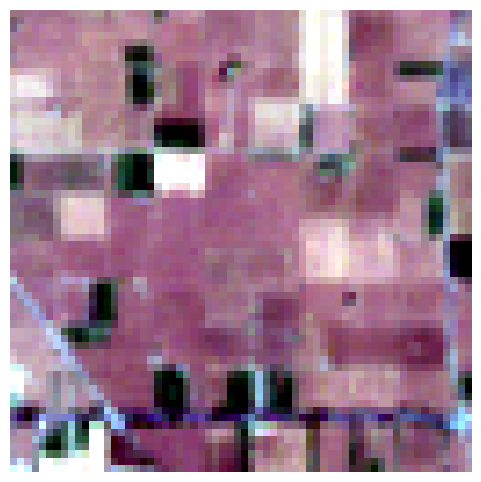


image 1/1 /content/26275 - Copy.png: 640x640 (no detections), 437.2ms
Speed: 6.8ms preprocess, 437.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


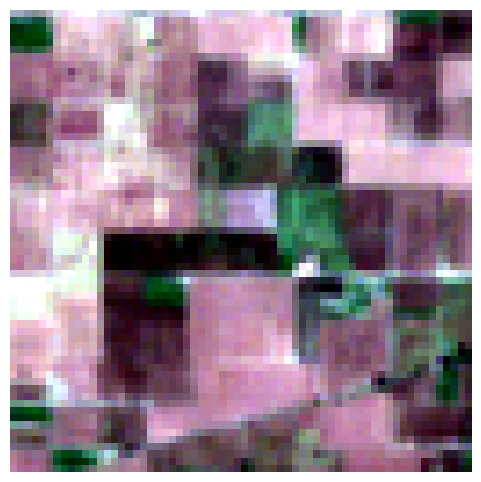


image 1/1 /content/6478 - Copy.png: 640x640 (no detections), 429.7ms
Speed: 8.6ms preprocess, 429.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


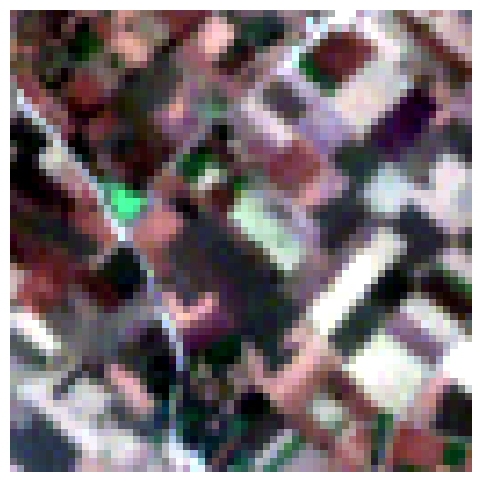


image 1/1 /content/6661 - Copy.png: 640x640 (no detections), 296.4ms
Speed: 9.4ms preprocess, 296.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


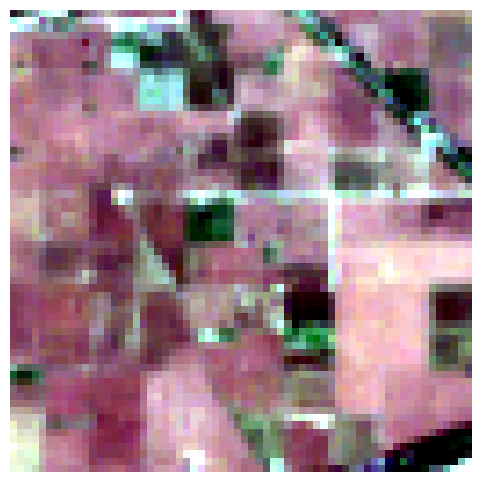


image 1/1 /content/6328 - Copy.png: 640x640 1 person, 291.8ms
Speed: 6.3ms preprocess, 291.8ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


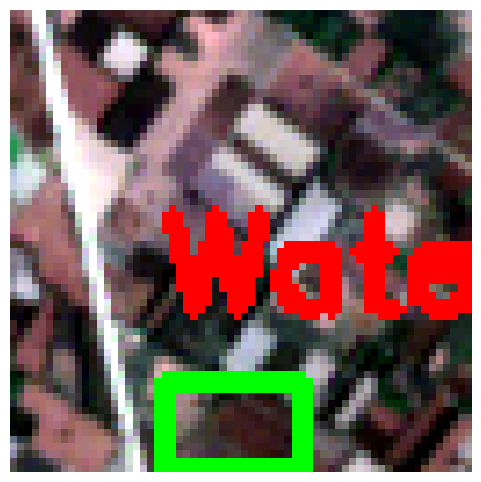


image 1/1 /content/29 - Copy (2) - Copy.png: 640x640 (no detections), 282.0ms
Speed: 3.7ms preprocess, 282.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


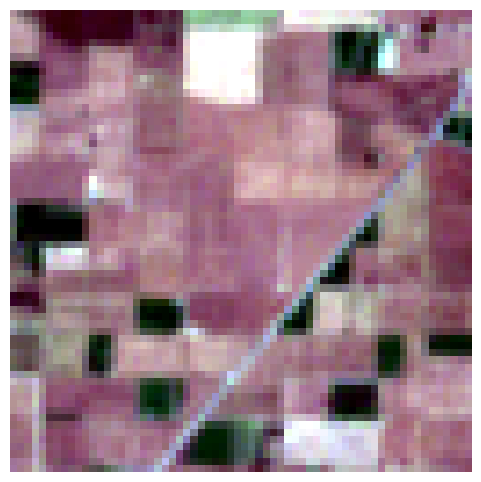


image 1/1 /content/21 - Copy (2) - Copy.png: 640x640 (no detections), 289.5ms
Speed: 3.6ms preprocess, 289.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


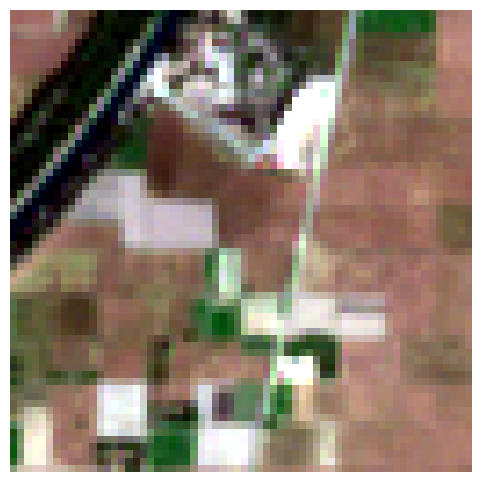


image 1/1 /content/6537 - Copy.png: 640x640 (no detections), 296.0ms
Speed: 6.3ms preprocess, 296.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


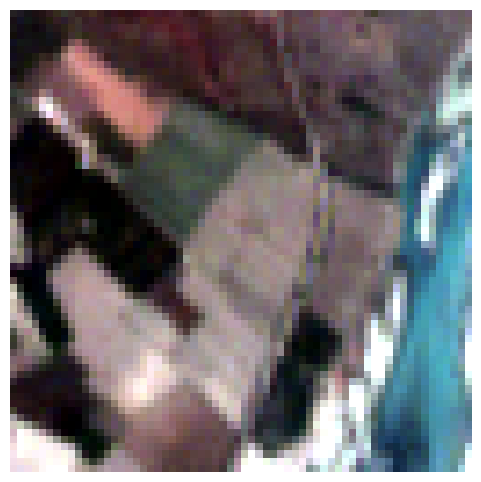


image 1/1 /content/42 - Copy (2) - Copy.png: 640x640 (no detections), 279.3ms
Speed: 5.9ms preprocess, 279.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


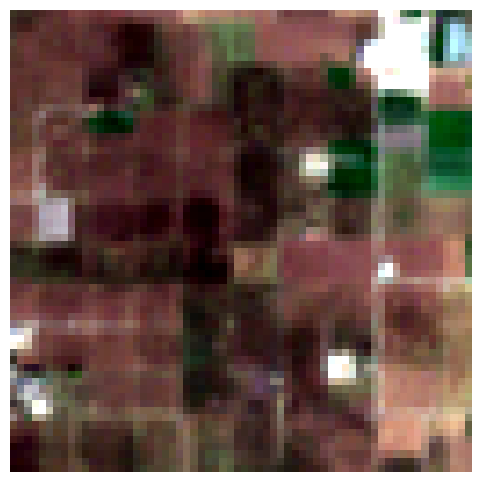


image 1/1 /content/6554 - Copy.png: 640x640 (no detections), 292.0ms
Speed: 5.2ms preprocess, 292.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


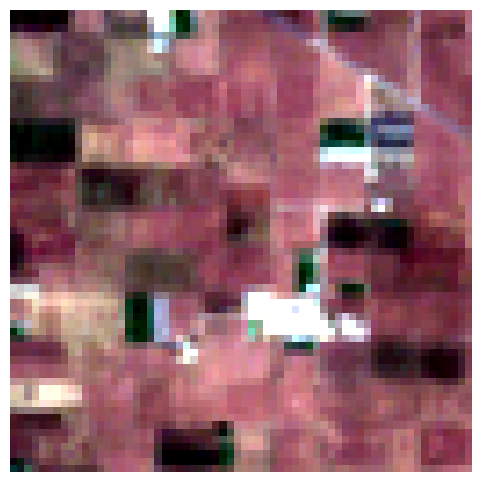


image 1/1 /content/37.png: 640x640 (no detections), 298.2ms
Speed: 4.6ms preprocess, 298.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


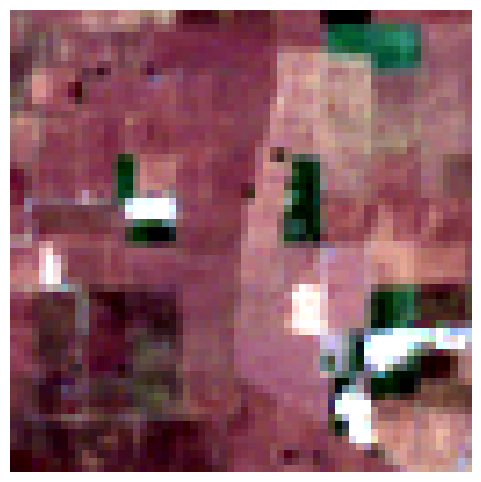


image 1/1 /content/6384 - Copy.png: 640x640 (no detections), 282.3ms
Speed: 4.3ms preprocess, 282.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


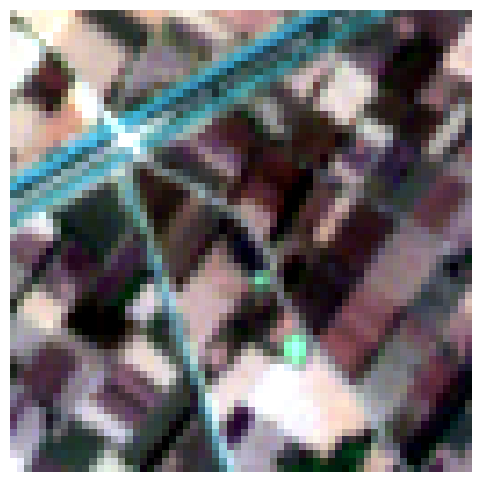


image 1/1 /content/6395 - Copy.png: 640x640 (no detections), 278.3ms
Speed: 6.1ms preprocess, 278.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


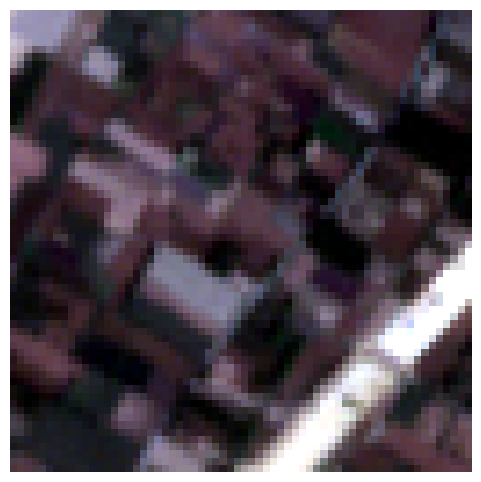


image 1/1 /content/6388 - Copy.png: 640x640 (no detections), 288.8ms
Speed: 6.0ms preprocess, 288.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


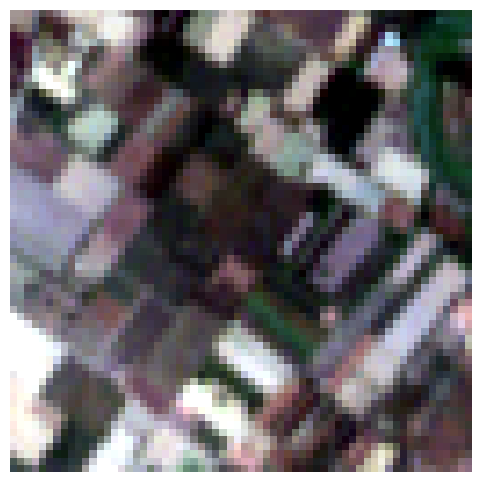


image 1/1 /content/6475 - Copy.png: 640x640 1 person, 276.4ms
Speed: 7.1ms preprocess, 276.4ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


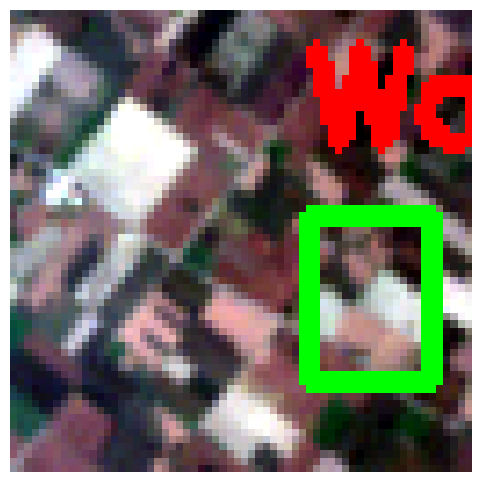


image 1/1 /content/6459 - Copy.png: 640x640 (no detections), 281.3ms
Speed: 5.8ms preprocess, 281.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


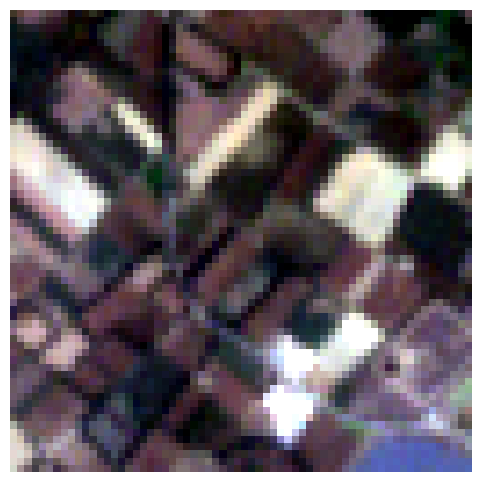


image 1/1 /content/6439 - Copy.png: 640x640 (no detections), 302.2ms
Speed: 6.1ms preprocess, 302.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


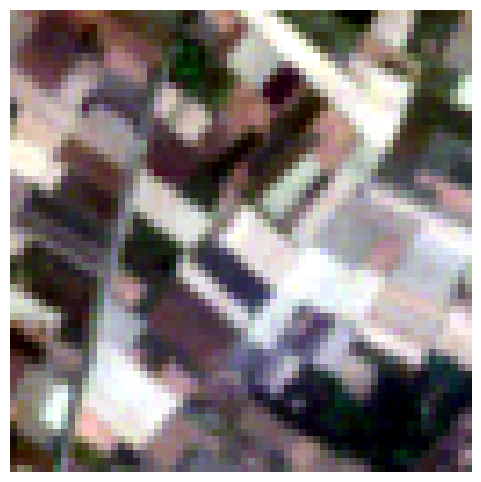


image 1/1 /content/23 - Copy (2) - Copy.png: 640x640 (no detections), 279.9ms
Speed: 7.3ms preprocess, 279.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


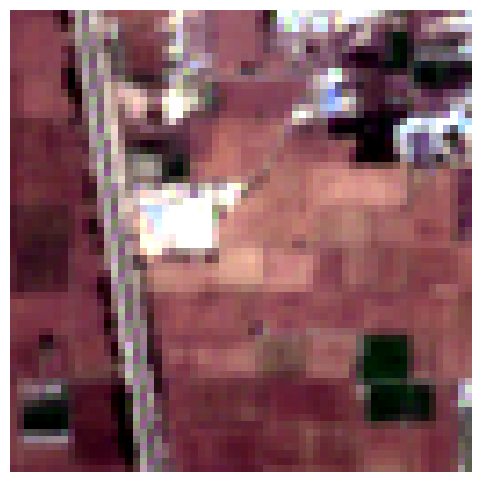


image 1/1 /content/7 - Copy (2) - Copy.png: 640x640 1 person, 1 traffic light, 287.0ms
Speed: 5.9ms preprocess, 287.0ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)


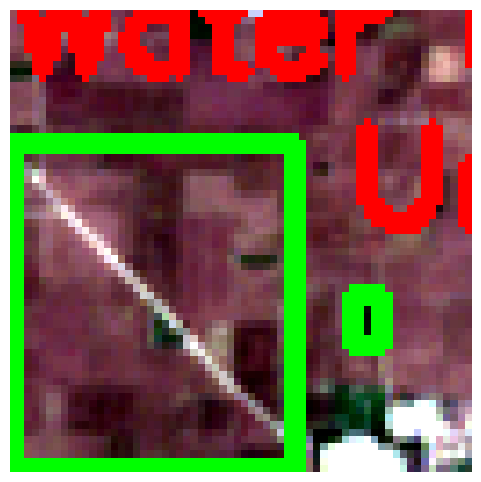


image 1/1 /content/6434 - Copy.png: 640x640 (no detections), 297.6ms
Speed: 9.2ms preprocess, 297.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


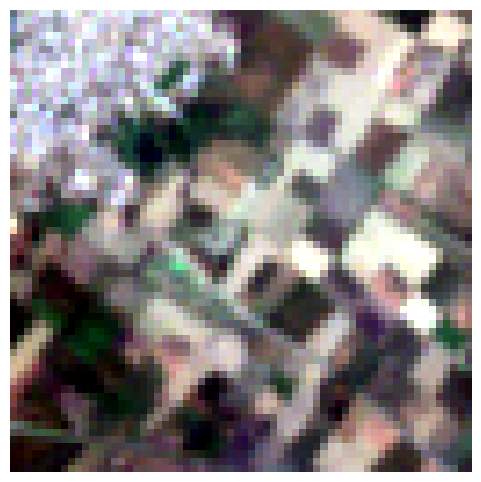


image 1/1 /content/2051.png: 640x640 (no detections), 280.6ms
Speed: 6.1ms preprocess, 280.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


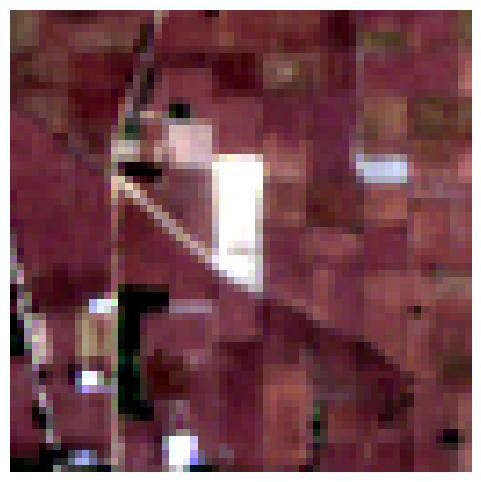


image 1/1 /content/6350 - Copy.png: 640x640 (no detections), 261.9ms
Speed: 3.6ms preprocess, 261.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


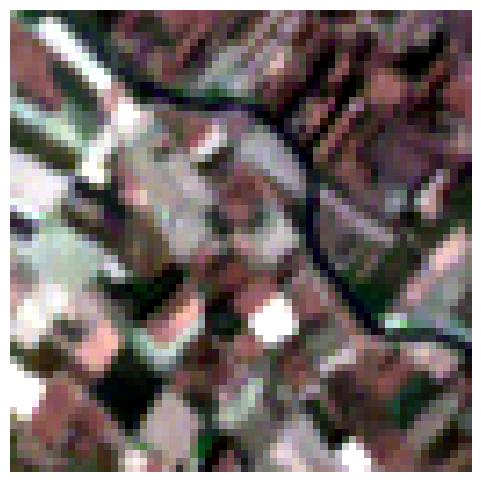


image 1/1 /content/6436 - Copy.png: 640x640 (no detections), 279.6ms
Speed: 3.7ms preprocess, 279.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


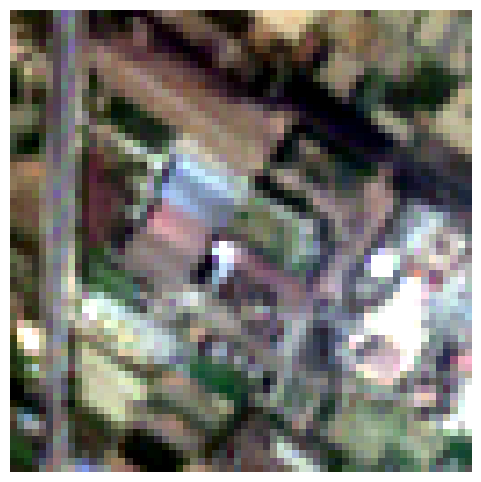


image 1/1 /content/6455 - Copy.png: 640x640 (no detections), 265.8ms
Speed: 4.8ms preprocess, 265.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


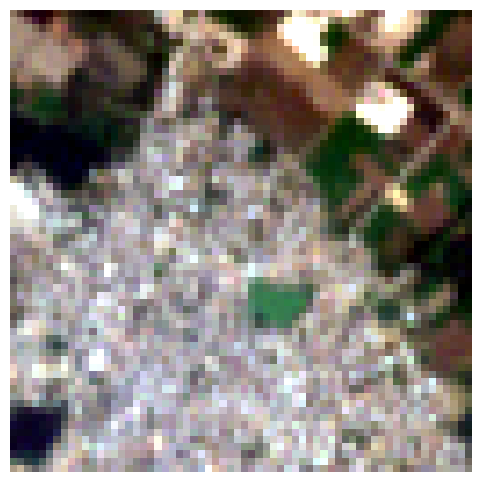


image 1/1 /content/26330.png: 640x640 (no detections), 267.3ms
Speed: 3.9ms preprocess, 267.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


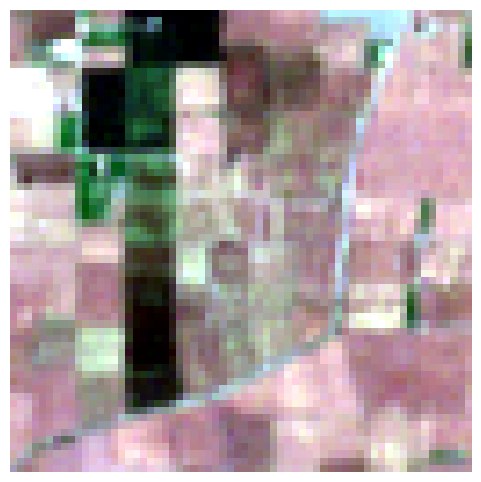


image 1/1 /content/6365 - Copy.png: 640x640 (no detections), 281.7ms
Speed: 3.7ms preprocess, 281.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


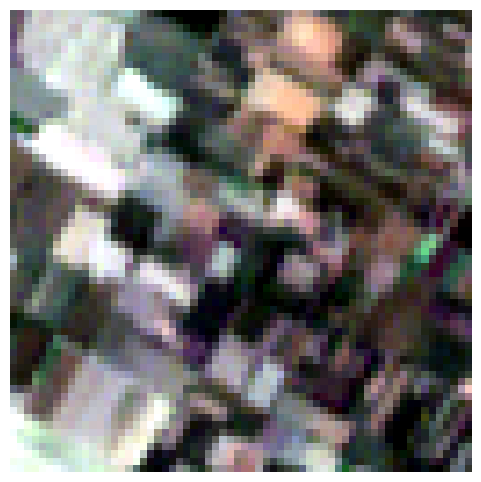


image 1/1 /content/6592 - Copy.png: 640x640 (no detections), 273.1ms
Speed: 4.5ms preprocess, 273.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


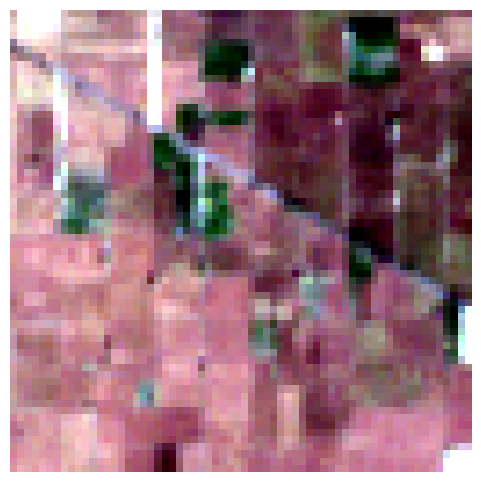


image 1/1 /content/6530 - Copy.png: 640x640 (no detections), 279.0ms
Speed: 3.5ms preprocess, 279.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


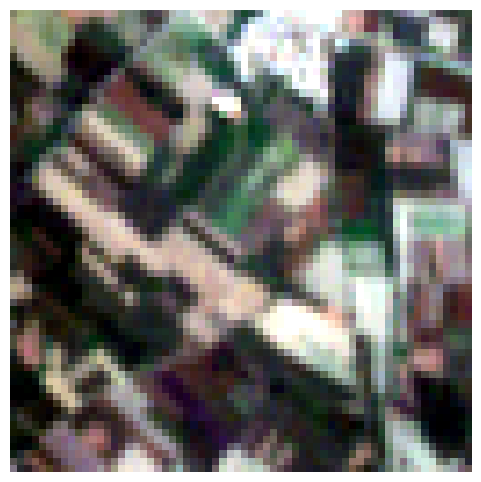


image 1/1 /content/6334 - Copy.png: 640x640 (no detections), 274.2ms
Speed: 3.5ms preprocess, 274.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


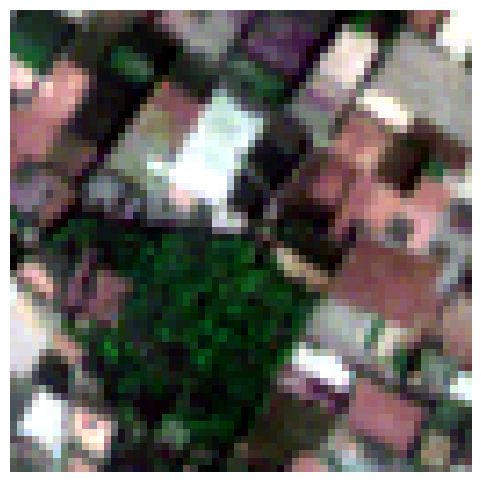


image 1/1 /content/5 - Copy (2) - Copy.png: 640x640 (no detections), 270.0ms
Speed: 4.9ms preprocess, 270.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


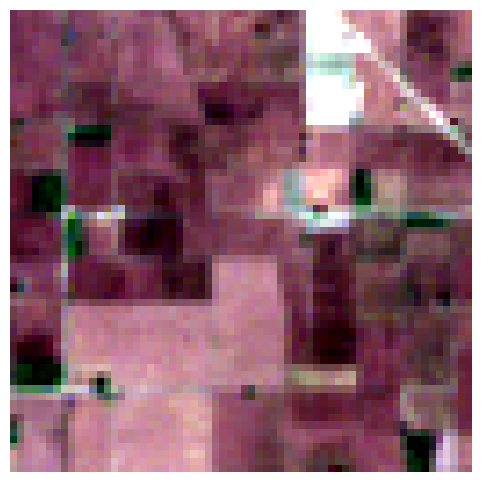


image 1/1 /content/6435 - Copy.png: 640x640 1 person, 273.2ms
Speed: 3.7ms preprocess, 273.2ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


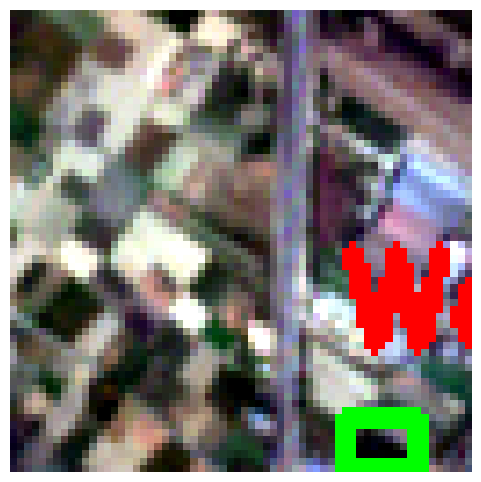


image 1/1 /content/26321.png: 640x640 (no detections), 275.5ms
Speed: 4.6ms preprocess, 275.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


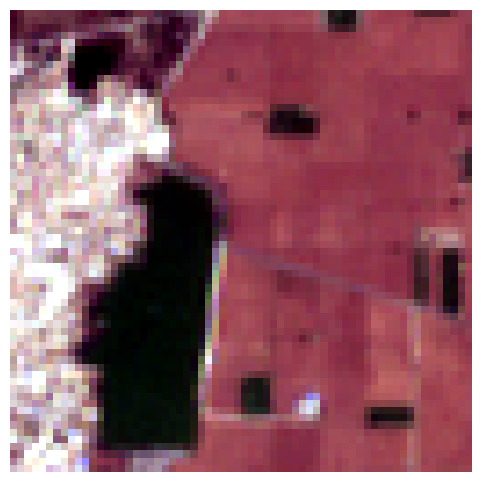


image 1/1 /content/6364 - Copy.png: 640x640 (no detections), 286.6ms
Speed: 3.6ms preprocess, 286.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


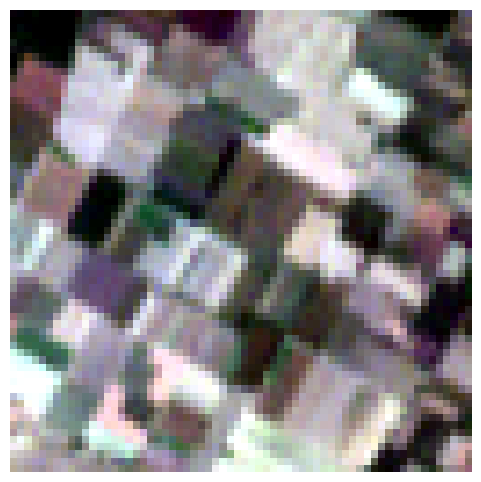


image 1/1 /content/6371 - Copy.png: 640x640 (no detections), 416.3ms
Speed: 3.8ms preprocess, 416.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


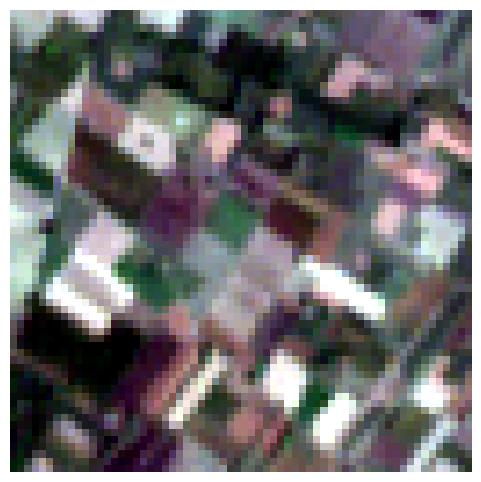


image 1/1 /content/6375 - Copy.png: 640x640 (no detections), 413.4ms
Speed: 5.6ms preprocess, 413.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


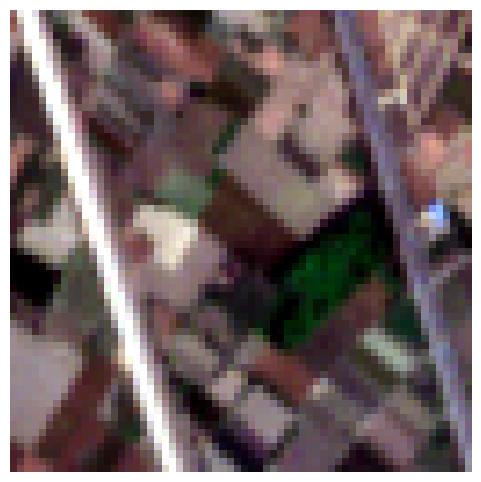


image 1/1 /content/6669 - Copy.png: 640x640 3 trains, 415.2ms
Speed: 4.6ms preprocess, 415.2ms inference, 20.5ms postprocess per image at shape (1, 3, 640, 640)


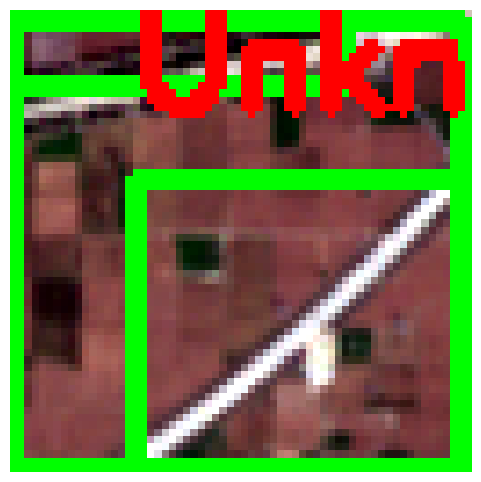


image 1/1 /content/6752 - Copy.png: 640x640 (no detections), 403.9ms
Speed: 5.1ms preprocess, 403.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


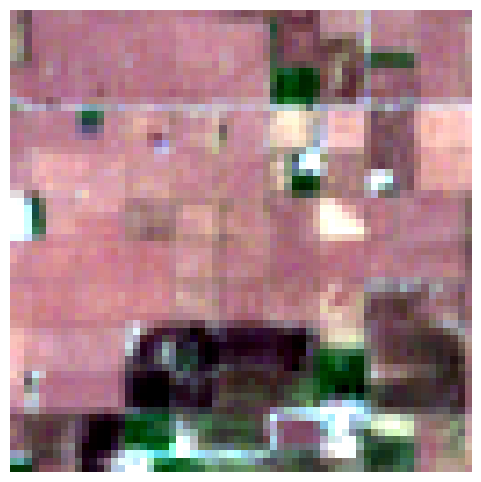


image 1/1 /content/6614 - Copy.png: 640x640 1 bus, 398.1ms
Speed: 3.6ms preprocess, 398.1ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)


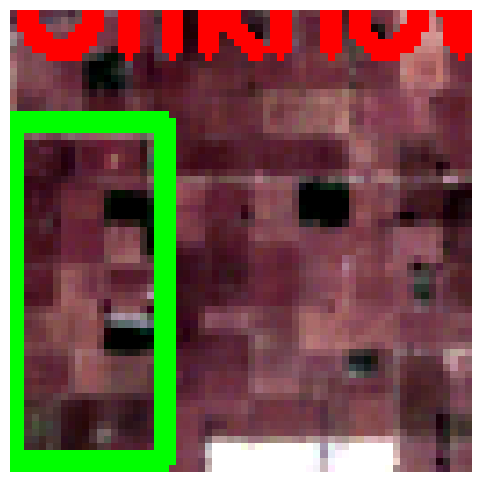


image 1/1 /content/42 - Copy (3).png: 640x640 (no detections), 381.9ms
Speed: 3.7ms preprocess, 381.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


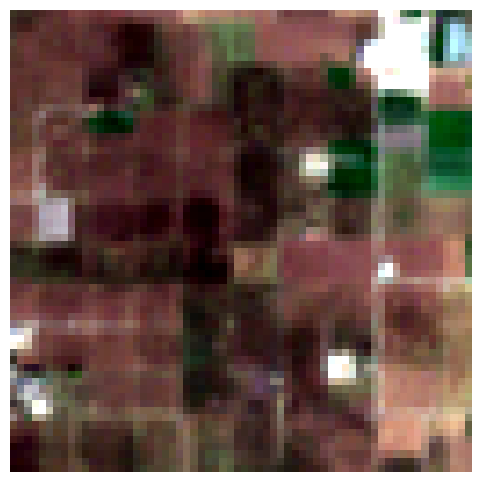


image 1/1 /content/17 - Copy (2) - Copy.png: 640x640 (no detections), 410.8ms
Speed: 3.6ms preprocess, 410.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


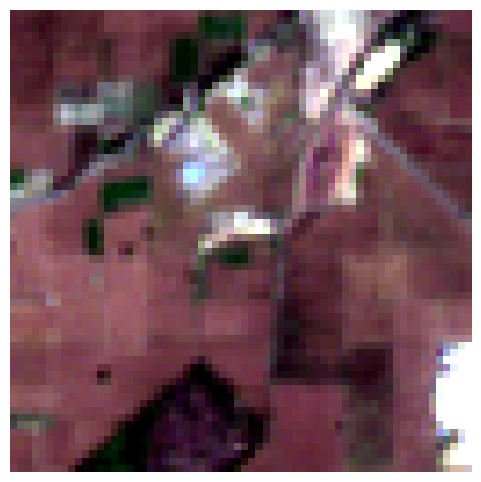


image 1/1 /content/9 - Copy (2) - Copy.png: 640x640 (no detections), 420.1ms
Speed: 3.8ms preprocess, 420.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


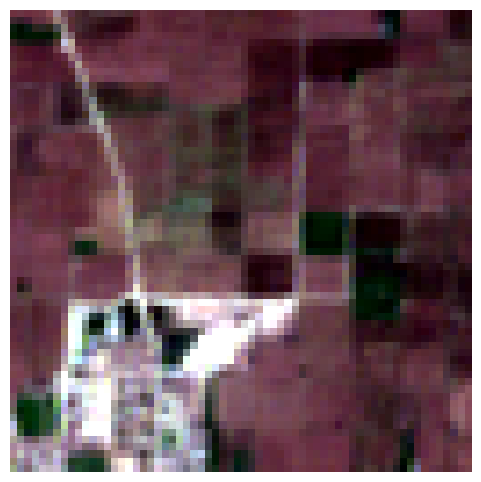


image 1/1 /content/6402 - Copy.png: 640x640 (no detections), 430.5ms
Speed: 7.4ms preprocess, 430.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


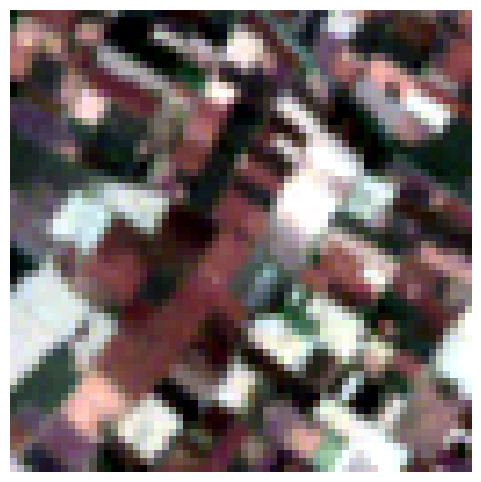


image 1/1 /content/26358.png: 640x640 (no detections), 284.2ms
Speed: 5.7ms preprocess, 284.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


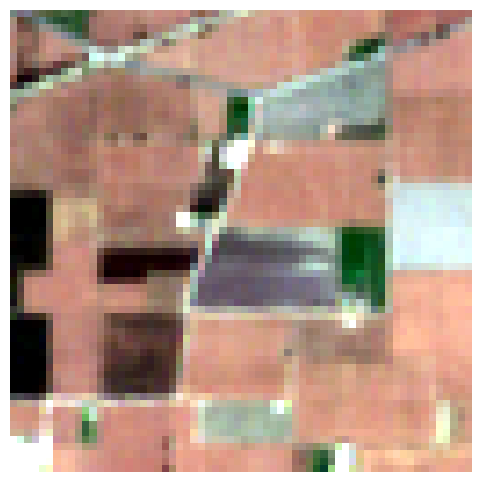


image 1/1 /content/6444 - Copy.png: 640x640 (no detections), 271.4ms
Speed: 3.7ms preprocess, 271.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


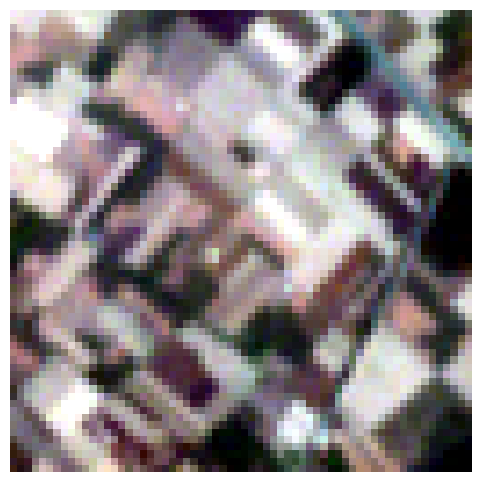


image 1/1 /content/6538 - Copy.png: 640x640 (no detections), 287.6ms
Speed: 3.7ms preprocess, 287.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


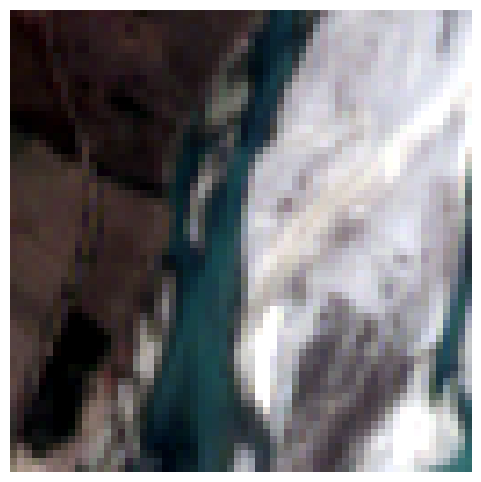


image 1/1 /content/26282 - Copy.png: 640x640 (no detections), 272.6ms
Speed: 4.5ms preprocess, 272.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


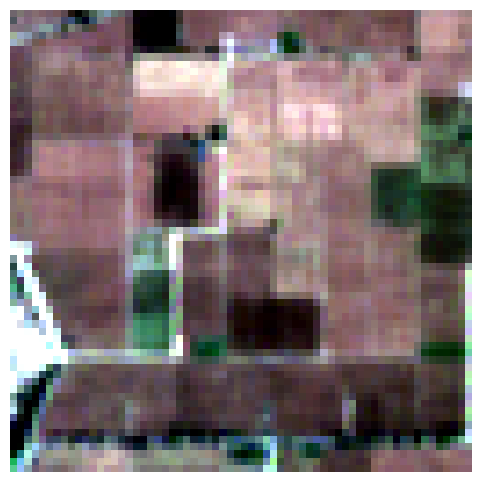


image 1/1 /content/2056.png: 640x640 (no detections), 269.7ms
Speed: 4.0ms preprocess, 269.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


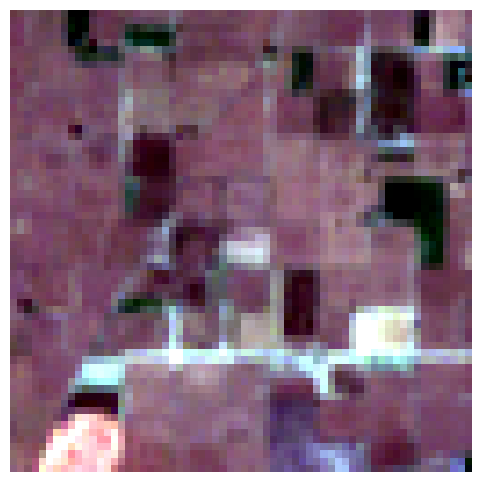


image 1/1 /content/37 - Copy (2) - Copy.png: 640x640 (no detections), 280.2ms
Speed: 3.8ms preprocess, 280.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


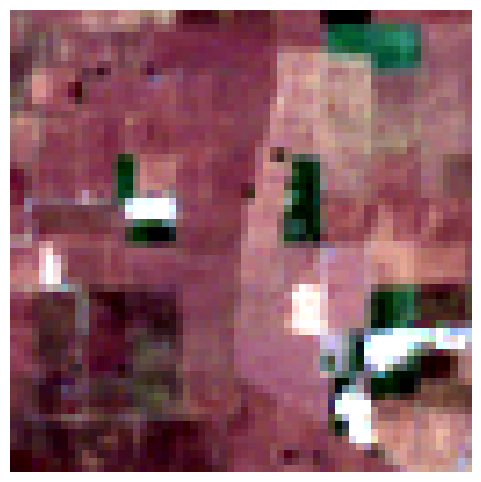


image 1/1 /content/26338.png: 640x640 (no detections), 272.8ms
Speed: 5.1ms preprocess, 272.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


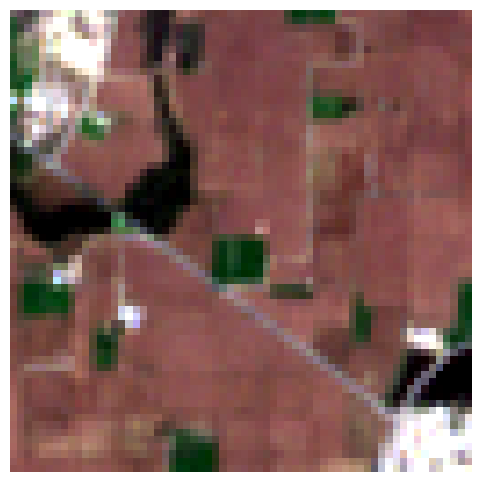


image 1/1 /content/38 - Copy (2) - Copy.png: 640x640 1 person, 1 traffic light, 276.8ms
Speed: 3.9ms preprocess, 276.8ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)


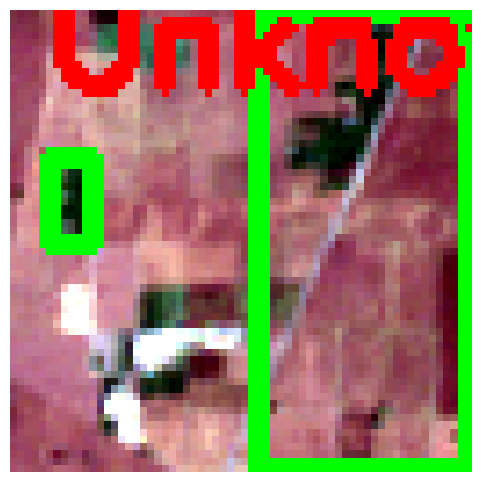


image 1/1 /content/6312 - Copy.png: 640x640 (no detections), 280.6ms
Speed: 4.1ms preprocess, 280.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


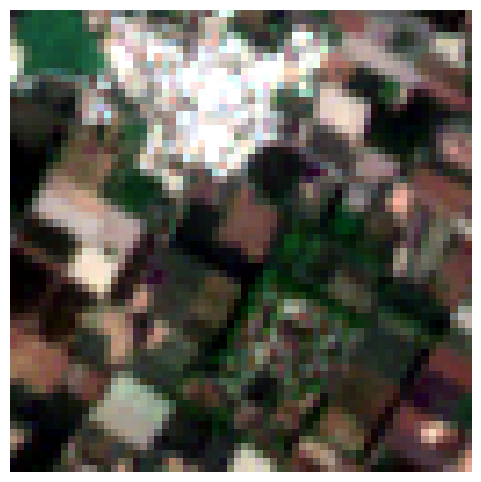


image 1/1 /content/20 - Copy (2) - Copy.png: 640x640 (no detections), 277.7ms
Speed: 4.2ms preprocess, 277.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


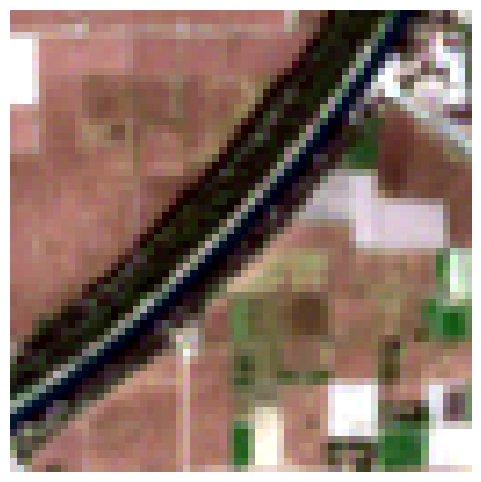


image 1/1 /content/6627 - Copy.png: 640x640 (no detections), 268.0ms
Speed: 5.9ms preprocess, 268.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


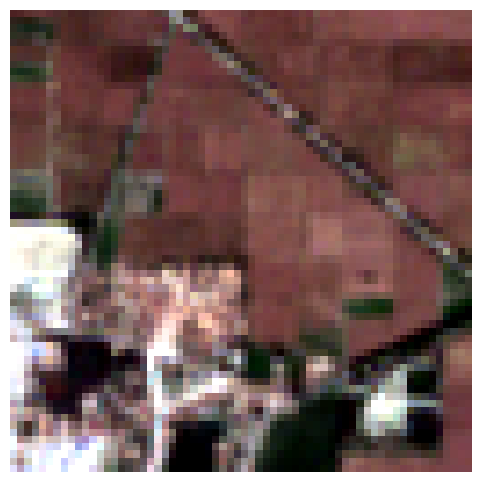


image 1/1 /content/6327 - Copy.png: 640x640 1 person, 299.3ms
Speed: 4.0ms preprocess, 299.3ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


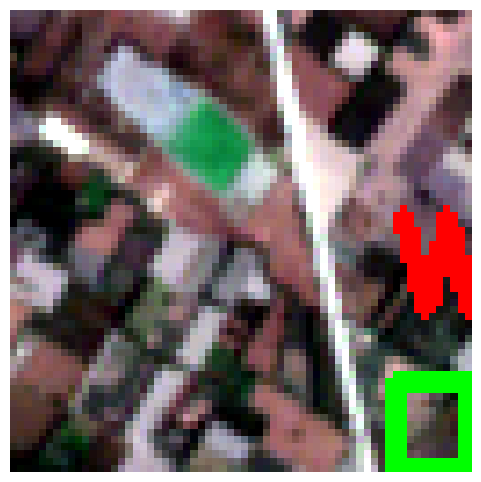


image 1/1 /content/26323.png: 640x640 1 train, 1 traffic light, 277.5ms
Speed: 4.0ms preprocess, 277.5ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)


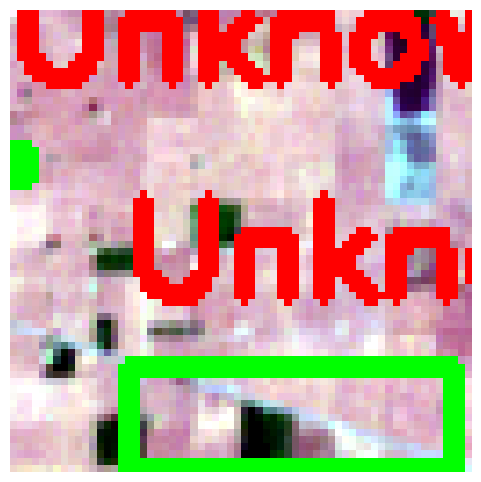


image 1/1 /content/72 - Copy - Copy.png: 640x640 1 bottle, 1 cup, 276.8ms
Speed: 3.7ms preprocess, 276.8ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


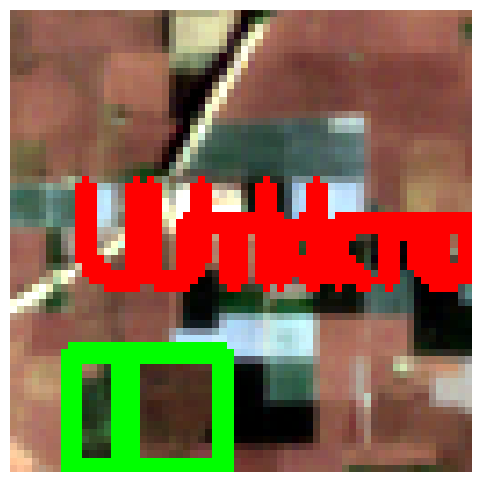


image 1/1 /content/6652 - Copy.png: 640x640 (no detections), 298.4ms
Speed: 4.4ms preprocess, 298.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


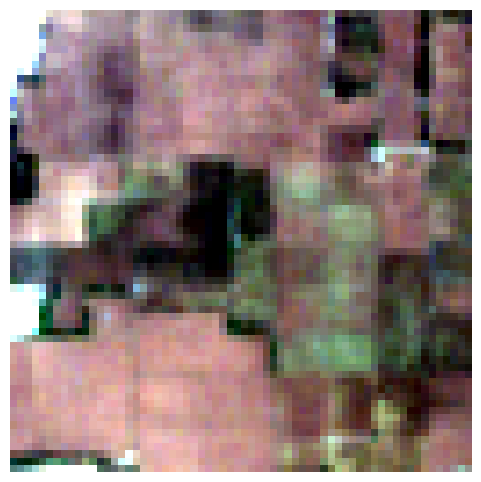


image 1/1 /content/6473 - Copy.png: 640x640 1 person, 276.2ms
Speed: 4.9ms preprocess, 276.2ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


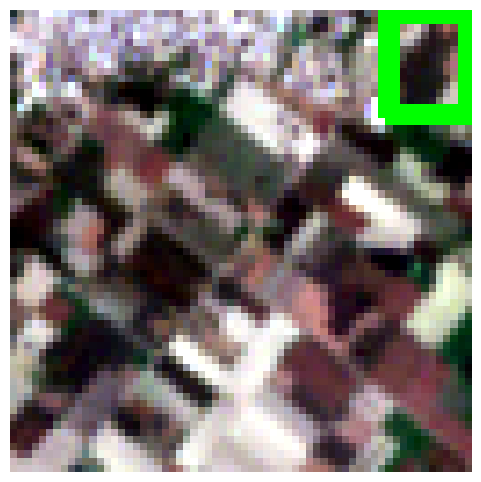


image 1/1 /content/6693 - Copy.png: 640x640 (no detections), 278.9ms
Speed: 4.1ms preprocess, 278.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


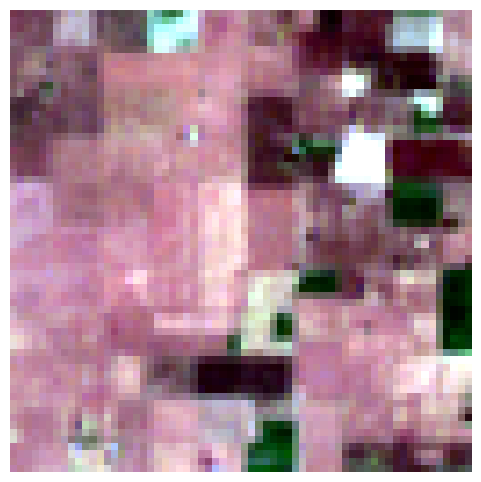


image 1/1 /content/58 - Copy (2) - Copy.png: 640x640 (no detections), 292.7ms
Speed: 3.7ms preprocess, 292.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


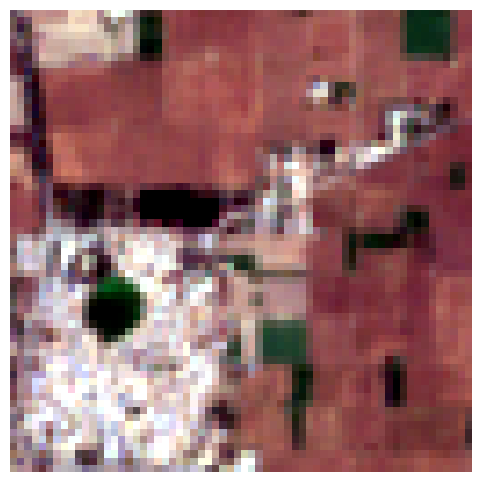


image 1/1 /content/6369 - Copy.png: 640x640 1 person, 280.5ms
Speed: 4.4ms preprocess, 280.5ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


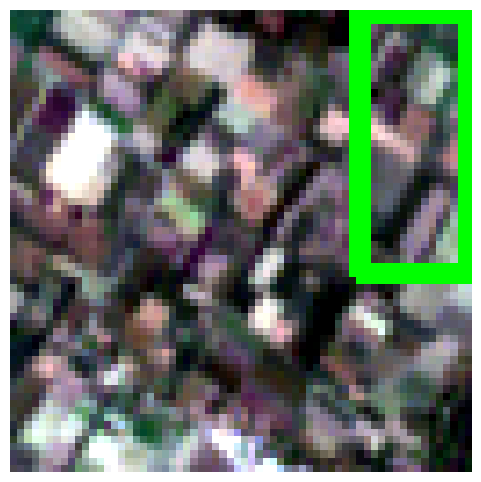


image 1/1 /content/6449 - Copy.png: 640x640 (no detections), 271.3ms
Speed: 3.7ms preprocess, 271.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


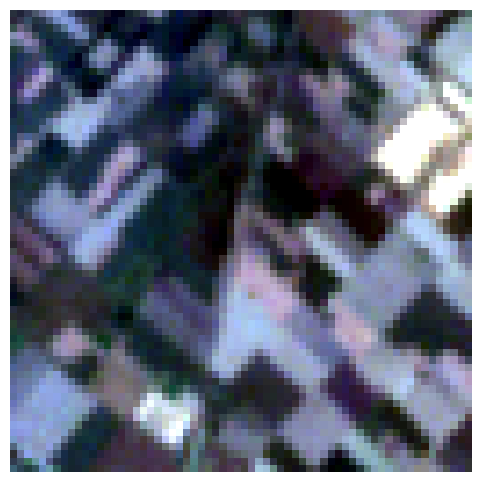


image 1/1 /content/2045.png: 640x640 1 tv, 290.0ms
Speed: 4.0ms preprocess, 290.0ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


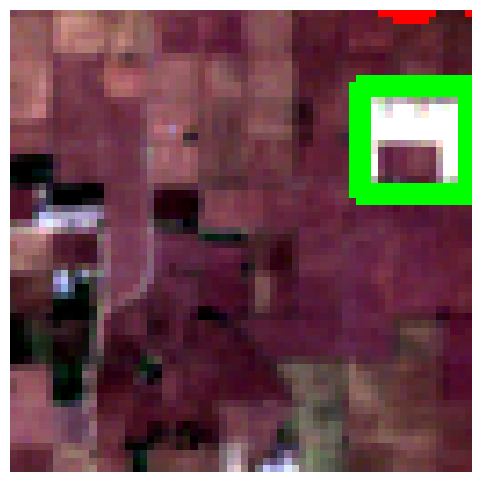


image 1/1 /content/6347 - Copy.png: 640x640 (no detections), 285.6ms
Speed: 6.0ms preprocess, 285.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


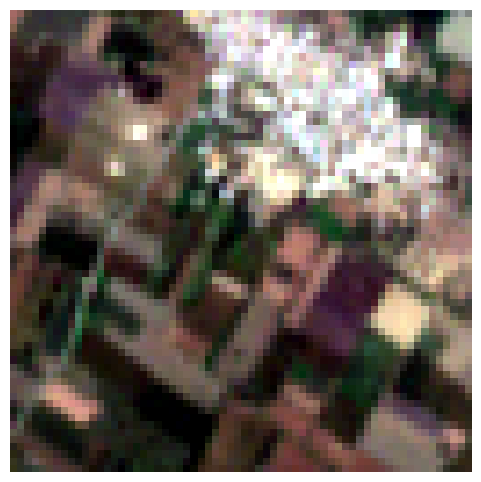


image 1/1 /content/3 - Copy (2) - Copy.png: 640x640 (no detections), 281.5ms
Speed: 3.8ms preprocess, 281.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


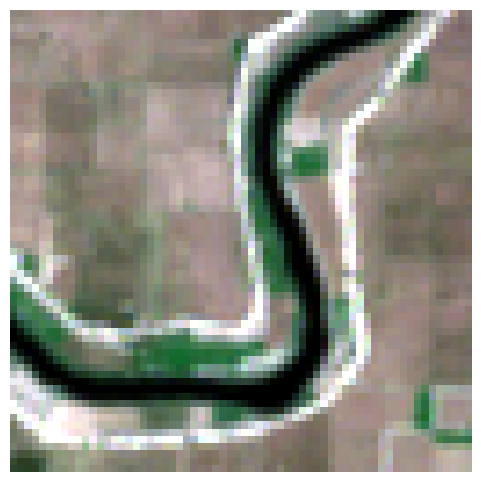


image 1/1 /content/4 - Copy (2) - Copy.png: 640x640 (no detections), 299.6ms
Speed: 5.7ms preprocess, 299.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


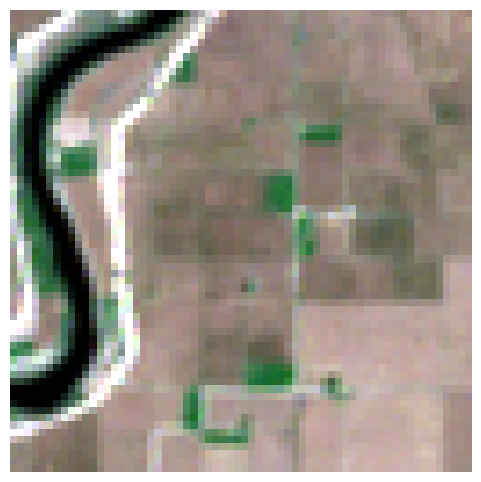

In [15]:
import os
import cv2
import matplotlib.pyplot as plt

image_dir = '/content'

for img_name in os.listdir(image_dir):
    if img_name.endswith((".jpg", ".png")):
        img_path = os.path.join(image_dir, img_name)

        # Run inference
        results = model(img_path)

        # Load image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        for r in results:
            if r.boxes is not None:
                for box in r.boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    cls_id = int(box.cls[0])
                    conf = float(box.conf[0])

                    label = CLASS_NAMES.get(cls_id, "Unknown")

                    # Draw bounding box
                    cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)

                    # Draw label
                    cv2.putText(
                        img,
                        f"{label} ({conf:.2f})",
                        (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        0.6,
                        (255,0,0),
                        2
                    )

        plt.figure(figsize=(6,6))
        plt.imshow(img)
        plt.axis("off")
        plt.show()


In [20]:
results[0].save(filename="output_detection.png")


'output_detection.png'

#conclusion

Sentinel-2 satellite images from the Sen-2 LULC dataset were used to test a pre-trained object detection model in Google Colab. The model was loaded and used only for inference, without any training or changes. Bounding boxes and class names were displayed on the satellite images to visualize detections. This helped in understanding how pre-trained GeoAI models work on satellite imagery and how to interpret object detection results.
